In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def errormetrics(a,b):
    print(accuracy_score(a,b))
    print(classification_report(a,b))
    ##print(roc_auc_score(a,b))
    print(confusion_matrix(a,b))

In [3]:
bank_raw = pd.read_csv("D:\\Data Science\\Machine Learning\\Group Assignment\\bank-additional-full.csv",sep=';')

In [4]:
bank_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

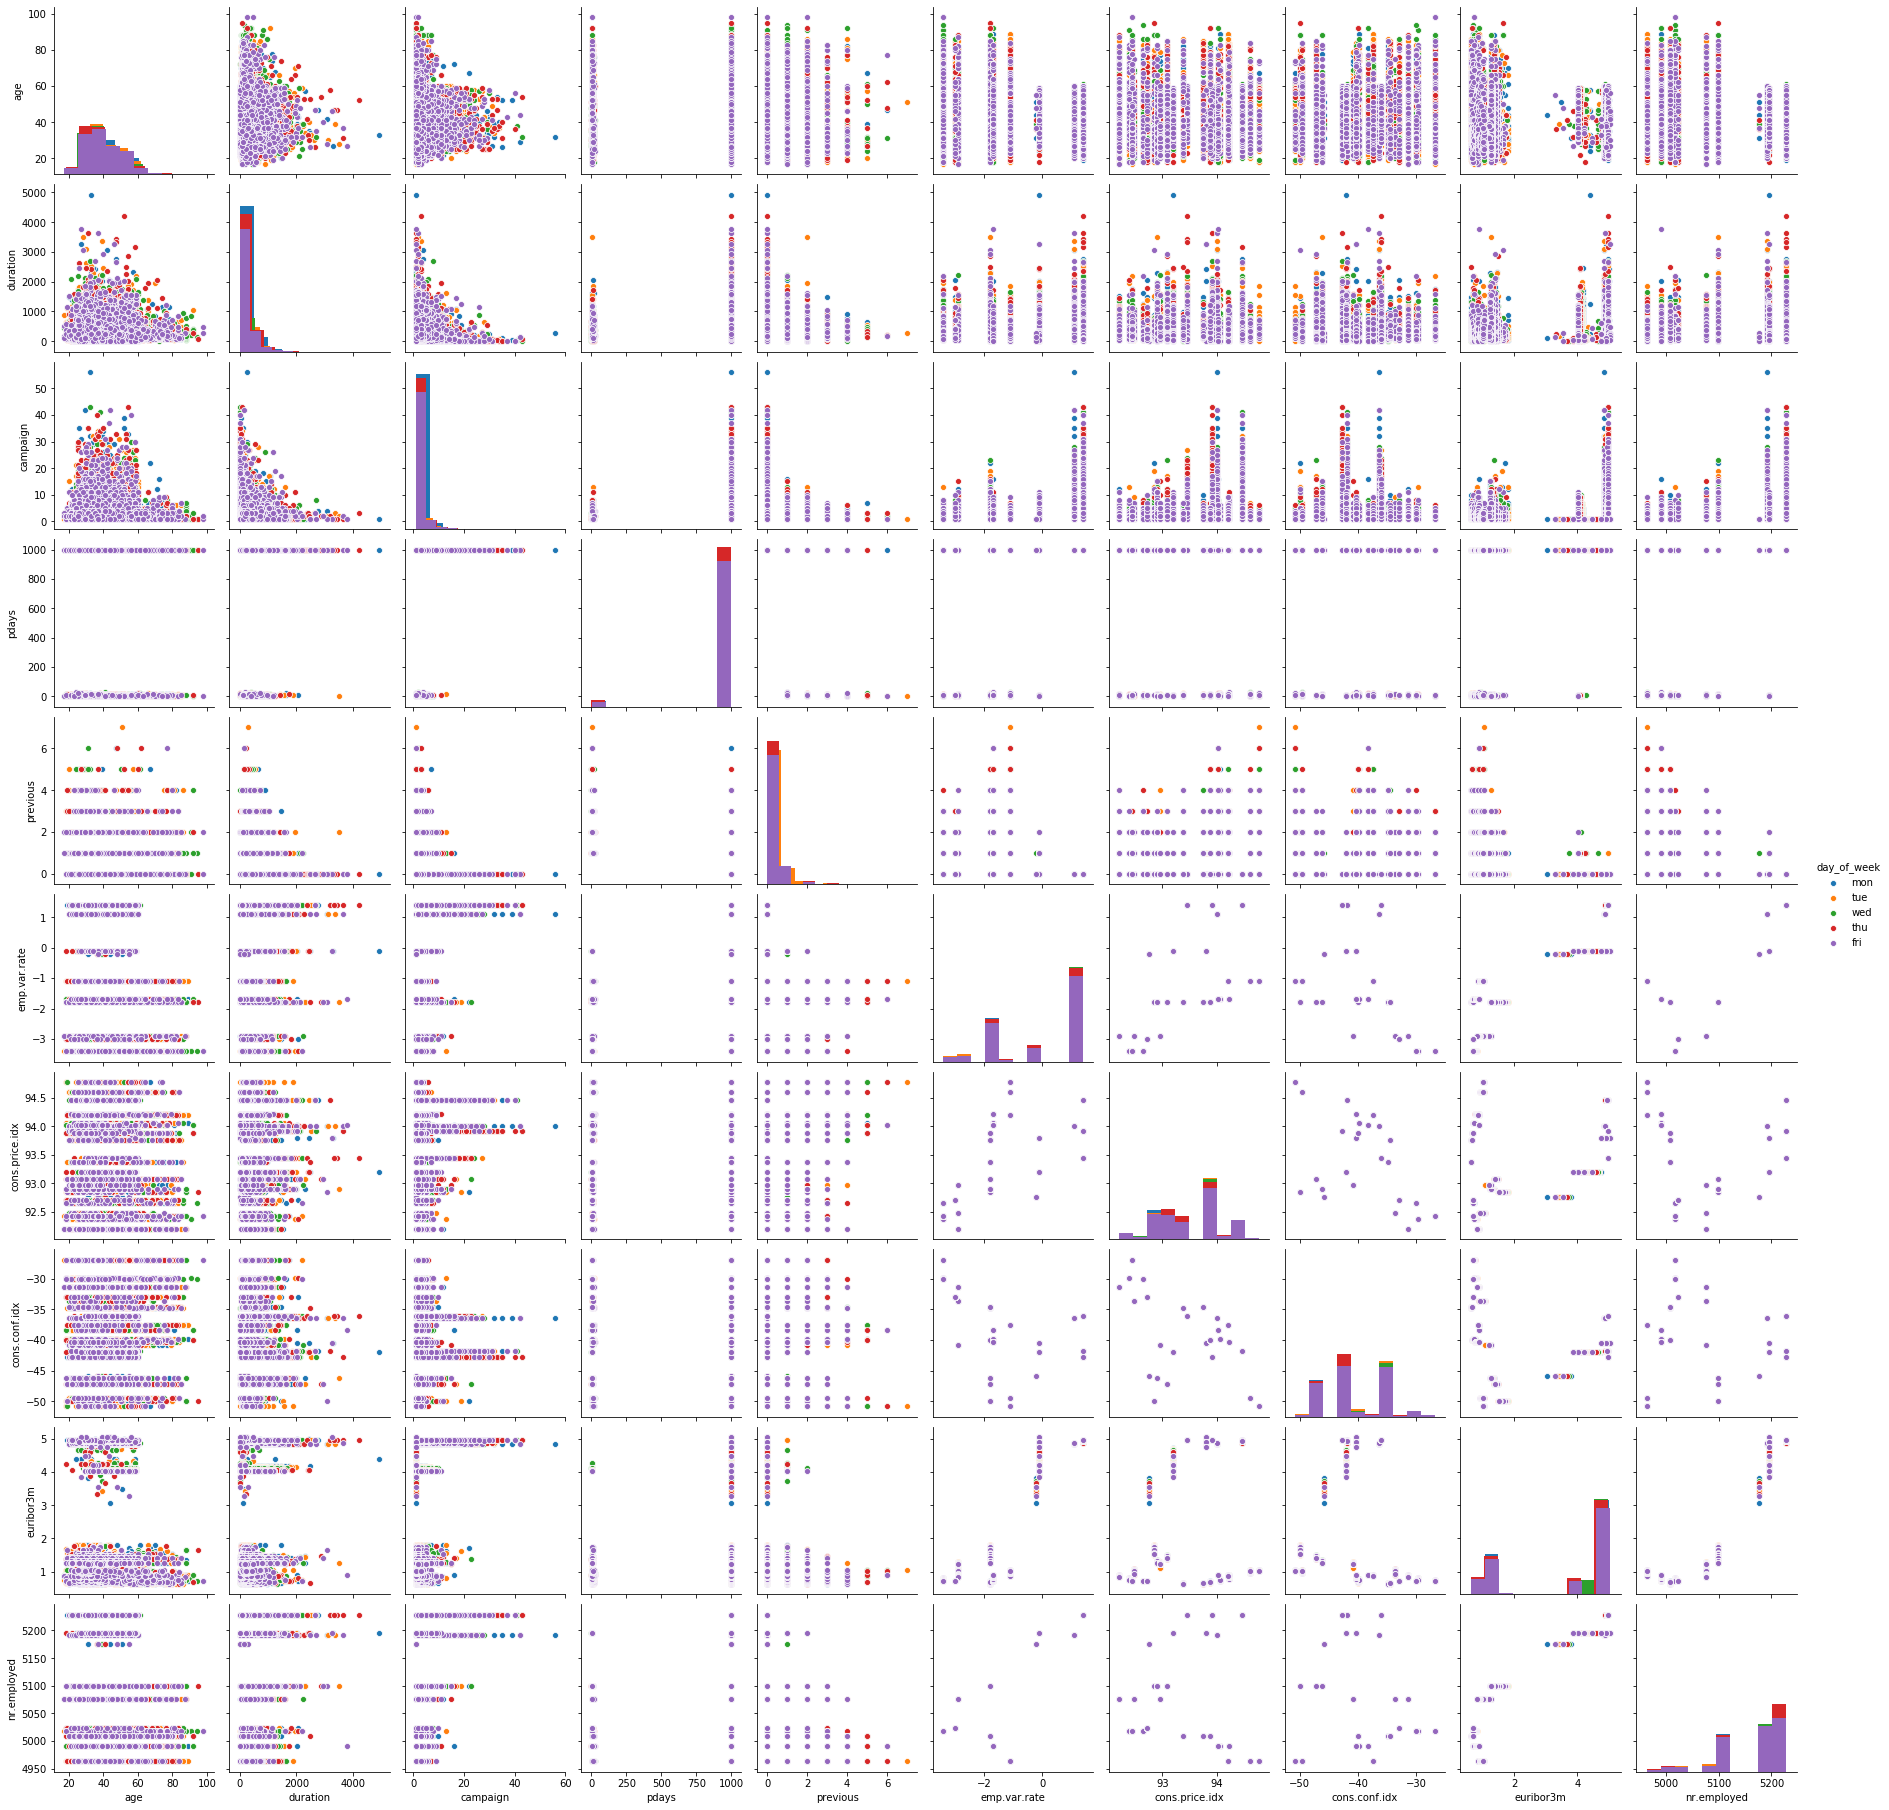

In [20]:
sns.pairplot(bank_raw,hue='day_of_week',diag_kind='hist')

In [6]:
bank_raw.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [8]:
bank_final = bank_raw

In [7]:
bank_final.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [5]:
bins = [0,20,40,60,80,120]
labels = ['1','2','3','4','5']
bank_final['age_new'] = pd.cut(bank_final.age,bins=bins, labels=labels)

In [9]:
bank_final['age_new'].value_counts()

2    23628
3    16510
4      791
1      140
5      119
Name: age_new, dtype: int64

In [6]:
bank_final = bank_final.drop('age',axis=1)

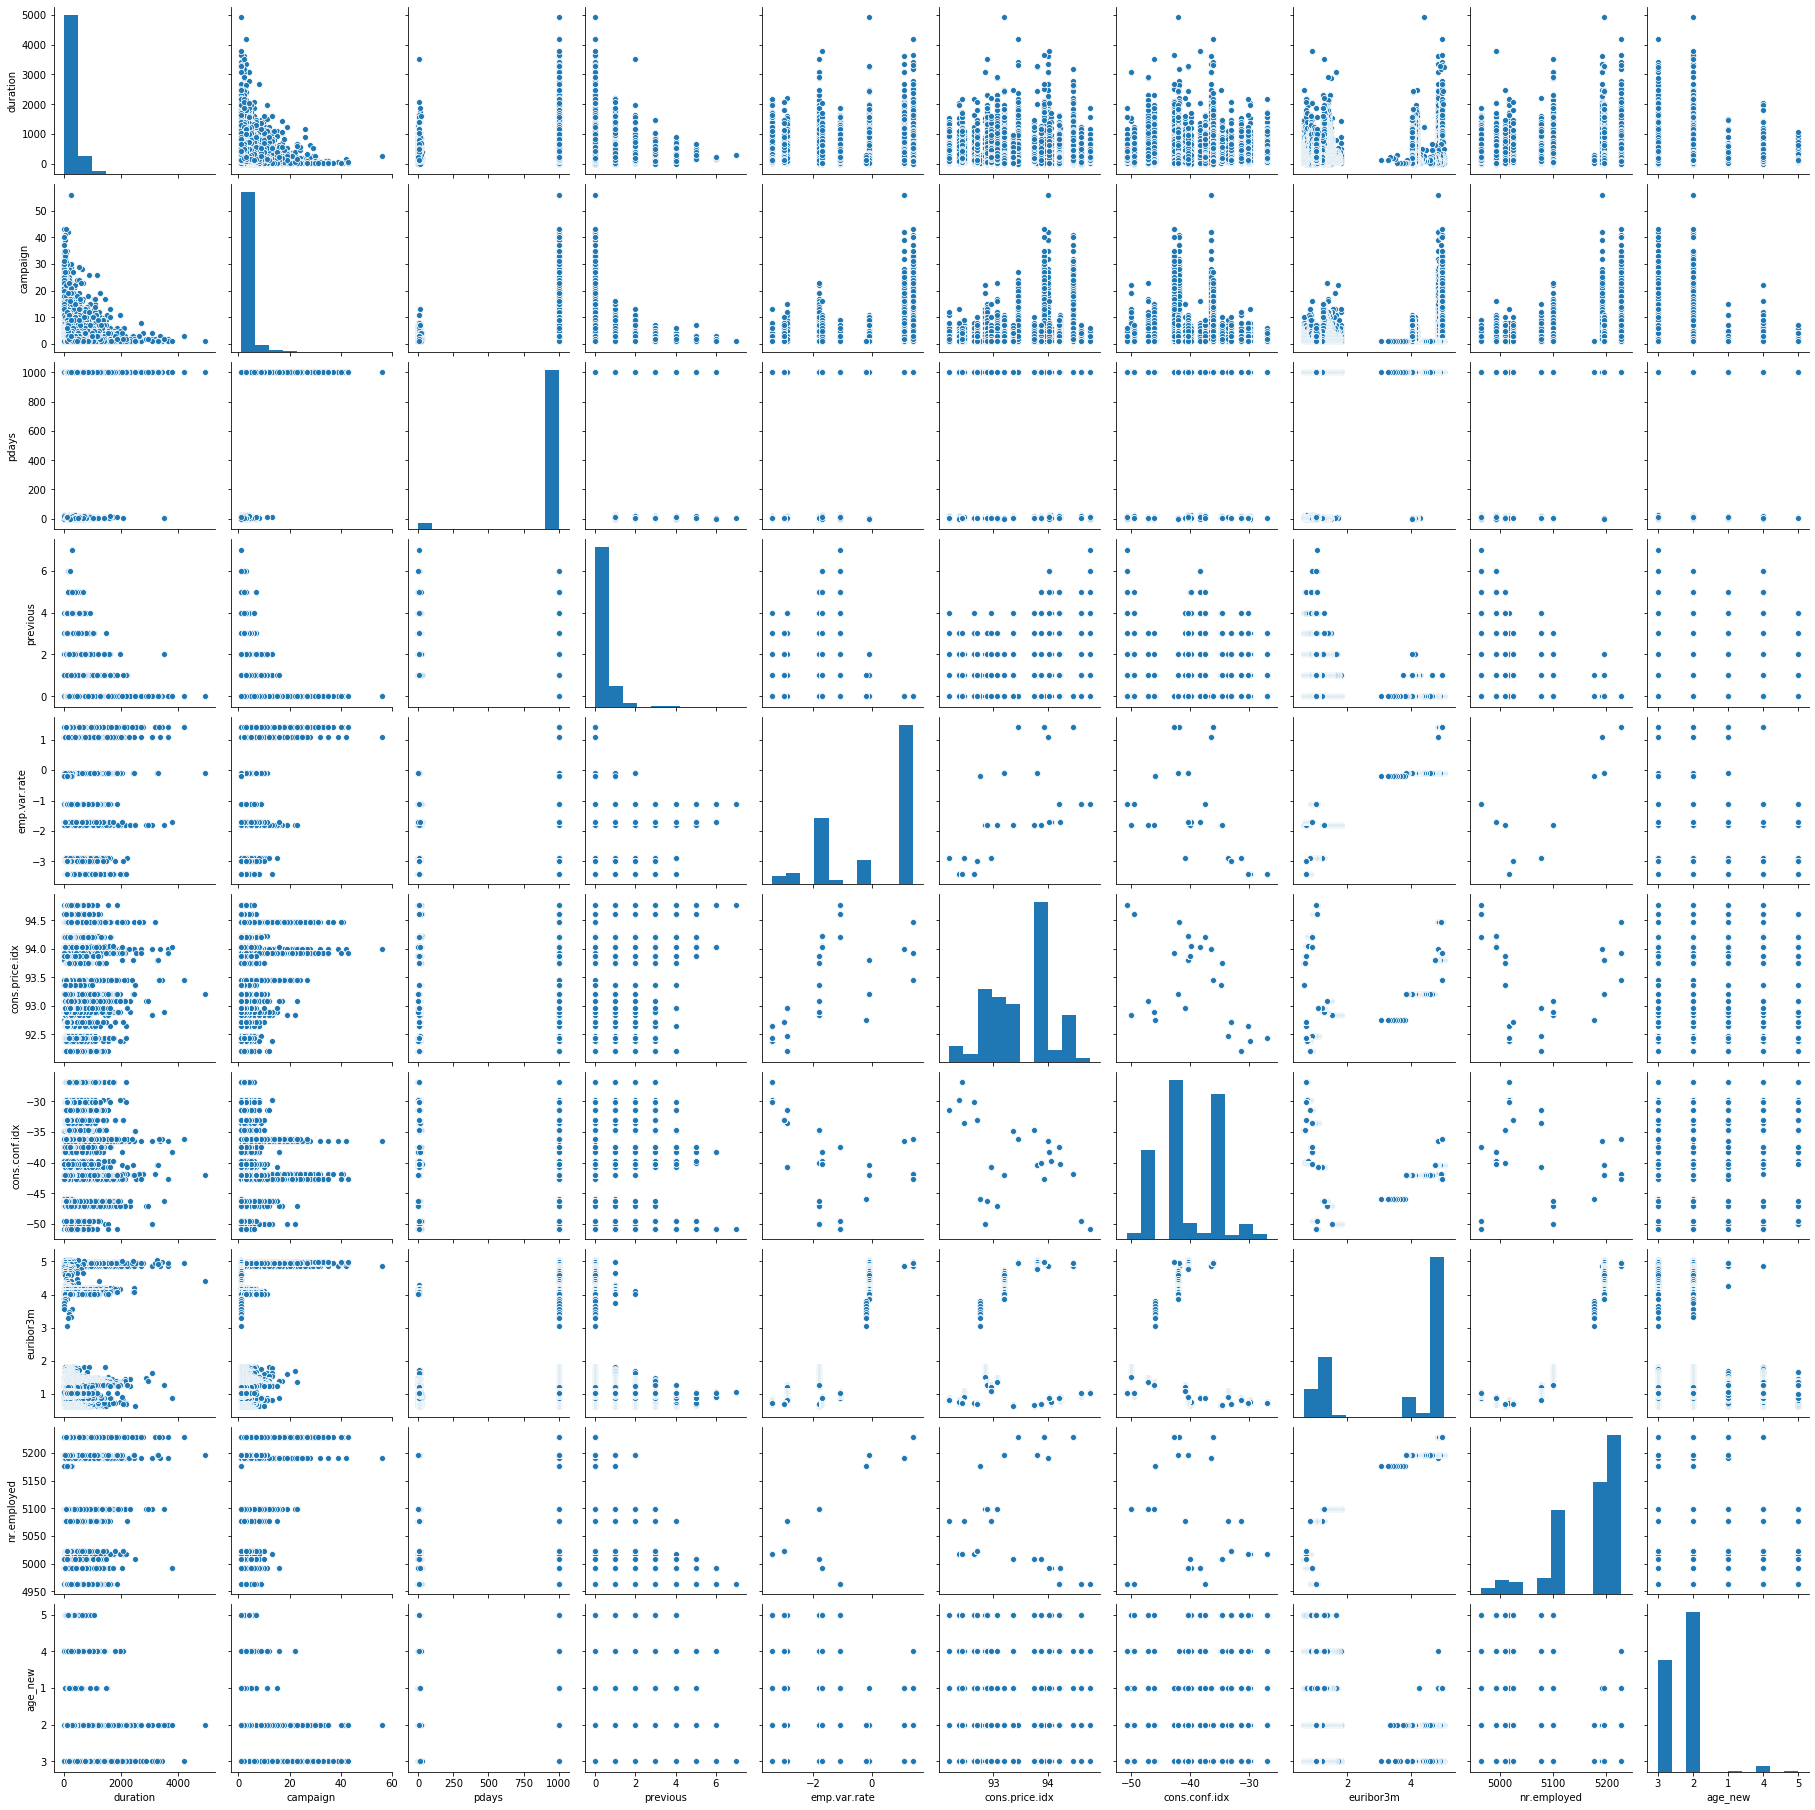

In [11]:
sns.pairplot(bank_final)

In [13]:
bank_final['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [63]:
bank_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job                 41188 non-null  object  
 1   marital             41188 non-null  object  
 2   education           41188 non-null  object  
 3   default             41188 non-null  object  
 4   housing             41188 non-null  object  
 5   loan                41188 non-null  object  
 6   contact             41188 non-null  object  
 7   month               41188 non-null  object  
 8   day_of_week         41188 non-null  object  
 9   poutcome            41188 non-null  object  
 10  y                   41188 non-null  object  
 11  age_new             41188 non-null  category
 12  campaign_new        41188 non-null  category
 13  previous_new        41188 non-null  category
 14  emp.var.rate_new    41188 non-null  category
 15  cons.price.idx_new  41188 non-null  

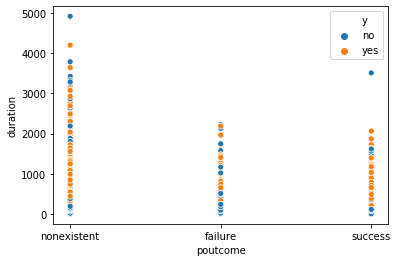

In [14]:
sns.scatterplot(x='poutcome',y='duration',hue='y',data=bank_final)

In [19]:
print(bank_final.groupby(bank_final['y'])['default'].value_counts())

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
Name: default, dtype: int64


In [9]:
bank_final = bank_final.drop('pdays',axis=1)

In [10]:
bins = [0,10,20,30,40,50,60]
labels = ['1','2','3','4','5','6']
bank_final['campaign_new'] = pd.cut(bank_final.campaign,bins=bins, labels=labels)
bank_final = bank_final.drop('campaign',axis=1)

In [11]:
bins = [-1,0.1,20]
labels = ['1','2']
bank_final['previous_new'] = pd.cut(bank_final.previous,bins=bins, labels=labels)

In [12]:
bank_final = bank_final.drop('previous',axis=1)

In [18]:
bins = [-4,-3,-2,-1,0,1,2,3]
labels = ['1','2','3','4','5','6','7']
bank_final['emp.var.rate_new'] = pd.cut(bank_final['emp.var.rate'],bins=bins, labels=labels)

In [19]:
bank_final = bank_final.drop('emp.var.rate',axis=1)

In [28]:
bins = [92,92.5,93,93.5,94,94.5,95]
labels = ['1','2','3','4','5','6']
bank_final['cons.price.idx_new'] = pd.cut(bank_final['cons.price.idx'],bins=bins, labels=labels)

In [29]:
bank_final = bank_final.drop('cons.price.idx',axis=1)

In [38]:
bins = [0,1,2,3,4,5,6]
labels = ['1','2','3','4','5','6']
bank_final['euribor3m_new'] = pd.cut(bank_final['euribor3m'],bins=bins, labels=labels)

In [39]:
bank_final = bank_final.drop('euribor3m',axis=1)

In [46]:
bins = [4950,5000,5050,5100,5150,5200,5250,5300]
labels = ['1','2','3','4','5','6','7']
bank_final['nr.employed_new'] = pd.cut(bank_final['nr.employed'],bins=bins, labels=labels)

In [47]:
bank_final = bank_final.drop('nr.employed',axis=1)

In [54]:
bank_final = bank_final.drop('duration',axis=1)

In [62]:
bank_final = bank_final.drop('cons.conf.idx',axis=1)

In [64]:
bank_final.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'age_new', 'campaign_new',
       'previous_new', 'emp.var.rate_new', 'cons.price.idx_new',
       'euribor3m_new', 'nr.employed_new'],
      dtype='object')

In [99]:
bank_final['job'] = bank_final['job'].astype('category')
bank_final['marital'] = bank_final['marital'].astype('category')
bank_final['education'] = bank_final['education'].astype('category')
bank_final['default'] = bank_final['default'].astype('category')
bank_final['housing'] = bank_final['housing'].astype('category')
bank_final['loan'] = bank_final['loan'].astype('category')
bank_final['contact'] = bank_final['contact'].astype('category')
bank_final['month'] = bank_final['month'].astype('category')
bank_final['day_of_week'] = bank_final['day_of_week'].astype('category')
bank_final['poutcome'] = bank_final['poutcome'].astype('category')

In [104]:
bank_final_cat = pd.get_dummies(bank_final.drop('y',axis=1))

In [106]:
bank_final_cat.shape

(41188, 92)

In [107]:
x = bank_final_cat

In [108]:
y = bank_final.y

In [109]:
x_validation = x.loc[35000:,:]
y_validation = y.loc[35000:]

In [110]:
x = x.loc[:35000,:]
y = y.loc[:35000]

In [112]:
x.shape

(35001, 92)

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("\nTrain Accuracy")
errormetrics(y_train,lr.predict(x_train))
print("\n\n\nTest Accuracy")
errormetrics(y_test,lr.predict(x_test))
print("\n\n\nValidation Accuracy")
errormetrics(y_validation,lr.predict(x_validation))

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Train Accuracy
0.9363928571428571
              precision    recall  f1-score   support

          no       0.94      1.00      0.97     26186
         yes       0.60      0.06      0.10      1814

    accuracy                           0.94     28000
   macro avg       0.77      0.53      0.53     28000
weighted avg       0.92      0.94      0.91     28000

[[26117    69]
 [ 1712   102]]



Test Accuracy
0.9348664476503357
              precision    recall  f1-score   support

          no       0.94      1.00      0.97      6552
         yes       0.41      0.04      0.07       449

    accuracy                           0.93      7001
   macro avg       0.68      0.52      0.52      7001
weighted avg       0.90      0.93      0.91      7001

[[6528   24]
 [ 432   17]]



Validation Accuracy
0.654169360051713
              precision    recall  f1-score   support

          no       0.67      0.86      0.75      3811
         yes       0.59      0.32      0.41      2377

    accuracy